In [1]:
import pandas as pd
import numpy as np
import ast 
import json
import time
import random
from matplotlib.ticker import MaxNLocator
from scipy import stats
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#makes a data frame of the reviews, minus the books

no_books_reviews_df = pd.read_csv('reviews (no books).csv')

In [3]:
#Generates a list of all book review files names

book_prefix='Book Reviews/reviews_books_'
book_review_files = []

for file_no in range(1,3001):
    book_review_files.append(book_prefix + str(file_no).zfill(4) + '.csv')

In [4]:
#Generates a list of data frames to concatenate

i = 0
book_concat_list=[]


for file in book_review_files:
    df = pd.read_csv(file)
    book_concat_list.append(df)
    i += 1
    
    if i % 100 == 0:
        print(file)
        
        

Book Reviews/reviews_books_0100.csv
Book Reviews/reviews_books_0200.csv
Book Reviews/reviews_books_0300.csv
Book Reviews/reviews_books_0400.csv
Book Reviews/reviews_books_0500.csv
Book Reviews/reviews_books_0600.csv
Book Reviews/reviews_books_0700.csv
Book Reviews/reviews_books_0800.csv
Book Reviews/reviews_books_0900.csv
Book Reviews/reviews_books_1000.csv
Book Reviews/reviews_books_1100.csv
Book Reviews/reviews_books_1200.csv
Book Reviews/reviews_books_1300.csv
Book Reviews/reviews_books_1400.csv
Book Reviews/reviews_books_1500.csv
Book Reviews/reviews_books_1600.csv
Book Reviews/reviews_books_1700.csv
Book Reviews/reviews_books_1800.csv
Book Reviews/reviews_books_1900.csv
Book Reviews/reviews_books_2000.csv
Book Reviews/reviews_books_2100.csv
Book Reviews/reviews_books_2200.csv
Book Reviews/reviews_books_2300.csv
Book Reviews/reviews_books_2400.csv
Book Reviews/reviews_books_2500.csv
Book Reviews/reviews_books_2600.csv
Book Reviews/reviews_books_2700.csv
Book Reviews/reviews_books_2

In [5]:
#Concats a single book reviews dataframe

book_reviews_df = pd.concat(book_concat_list)

book_reviews_df['category'] = 'Books'

In [6]:
#concats books and no books review dataframes

concat_list = [no_books_reviews_df, book_reviews_df]

all_reviews = pd.concat(concat_list)

In [7]:
#creates list of all file names containing the meta data

meta_list = []

# apps
#prefix='Metadata/meta_Apps_for_Android_file'
#for file_no in range(1,2):
#    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

#books
prefix='Metadata/meta_Books_file'
for file_no in range(1,35):
    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')
    
#CDs
prefix='Metadata/meta_CDs_and_Vinyl_file'
for file_no in range(1,6):
    meta_list.append(prefix + str(file_no).zfill(4) + '.csv')

In [8]:
#concats a list of smaller metadata datafames

meta_concat_list=[]


for file in meta_list:
    df = pd.read_csv(file)
    meta_concat_list.append(df)


In [9]:
#concats a single metadata dataframe, de-dupes

meta_df = pd.concat(meta_concat_list)

print(len(meta_df))

meta_df.drop_duplicates(inplace=True)

print(len(meta_df))

390000
390000


In [10]:
#merges the reviews df with the metadata df

amazon_data = all_reviews.merge(meta_df, how='left', left_on='asin', right_on='ASIN')

In [11]:
#Drop 'ASIN' from the right column

#Some reviews will still have no metadata

amazon_data = amazon_data.drop('ASIN', axis=1)

In [12]:
len(amazon_data)

4821622

In [13]:
amazon_data.groupby(['category']).count()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
category,,,,,,,,,,,
Books,3000000,3000000,3000000,2999753,3000000,0,0,0,0,2539170,0
CDs and Vinyl,327759,327759,327759,327748,327759,327759,326635,327740,327759,166810,255726
Electronics,1493863,1493863,1493863,1492902,1493863,1493863,1469941,1493849,1493863,0,0


In [14]:
#  categories = Books , CDs and Vinyl , Electronics
#  some rows don't inclued any reviw texts. so i need to drop them.
amazon_data['reviewText'].replace('', np.nan)

amazon_data.dropna(axis=0, how='any', subset=['reviewText'], inplace=True)


amazon_data.groupby(['category']).count()


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
category,,,,,,,,,,,
Books,2999753,2999753,2999753,2999753,2999753,0,0,0,0,2538950,0
CDs and Vinyl,327748,327748,327748,327748,327748,327748,326624,327729,327748,166803,255718
Electronics,1492902,1492902,1492902,1492902,1492902,1492902,1468982,1492888,1492902,0,0


In [15]:
books = amazon_data[amazon_data['category']=='Books']
books.reset_index(drop=True, inplace=True)
just_book = books.sample(10000)
just_book.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
1585291,0425252043,Books,"[1, 1]",5.0,I had already read Hero's Journey by JJ Cook n...,"01 4, 2014",NaN,NaN,NaN,NaN,That Old Flame of Mine (A Sweet Pepper Fire Br...,NaN
1746304,0448433400,Books,"[0, 0]",5.0,"The stories were just as I remember, and just ...","01 31, 2014",NaN,NaN,NaN,NaN,Storybook Treasury of Dick and Jane and Friends,NaN
1258197,0373861451,Books,"[0, 0]",4.0,Another Hood man that likes to go after the ha...,"11 9, 2012",NaN,NaN,NaN,NaN,The Perfect Seduction (Kimani Romance),NaN
1234894,0373776586,Books,"[0, 0]",5.0,Swooned and chuckled the entire time. Parker d...,"03 9, 2013",NaN,NaN,NaN,NaN,Somebody To Love (Hqn),NaN
319729,006222543X,Books,"[0, 0]",5.0,Reconstructing Amelia is a story about a mothe...,"03 29, 2014",NaN,NaN,NaN,NaN,Reconstructing Amelia: A Novel,NaN


In [17]:
cd_vinyls = amazon_data[amazon_data['category']=='CDs and Vinyl']
cd_vinyls.reset_index(drop=True, inplace=True)
just_cds = cd_vinyls.sample(10000)
just_cds.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
318953,B00F429ZB4,CDs and Vinyl,"[1, 2]",4.0,Even though Julie Roberts has been off the sce...,"11 24, 2013",AL6LA0DYESCUG,Donna Lynn,Great country music adults can enjoy,1.385251e+09,NaN,NaN
304575,B00C061HZY,CDs and Vinyl,"[2, 3]",5.0,"I first came across Daft Punk in high school, ...","12 25, 2013",AU4NVFSJFP6IG,"Tom Emanuel ""Music Fan & a Half""","Excuse me, sir, can you spare a moment to talk...",1.387930e+09,NaN,NaN
292897,B00A9T1HUO,CDs and Vinyl,"[1, 3]",5.0,Josh Groban... one of the world's most angelic...,"02 13, 2013",A25LFXCQLN267D,"E. Munoz ""EdwardC""",JG,1.360714e+09,NaN,NaN
111255,B000056IDT,CDs and Vinyl,"[0, 2]",2.0,I had high expectations for this band when I f...,"10 2, 2010",A3G86YQWTGXV4K,Jared M. Lund,Background music,1.285978e+09,Catchall,343838.0
311691,B00DMRNMRQ,CDs and Vinyl,"[3, 8]",5.0,How does he do it???? I see some ppl giving th...,"07 9, 2013",A1FAFJK4EQSYA7,Andrew Morra,Hova the GOD,1.373328e+09,NaN,NaN


In [18]:
electronics = amazon_data[amazon_data['category']=='Electronics']
electronics.reset_index(drop=True, inplace=True)
just_electronics = electronics.sample(10000)
just_electronics.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank
792998,B004N625AK,Electronics,"[0, 0]",1.0,This router drops devices non-stop. I have two...,"03 26, 2012",AASH83SNPTUXG,Emerica9138,Loses Connectivity to Devices Frequently,1.332720e+09,NaN,NaN
31659,B00007GQLS,Electronics,"[3, 3]",5.0,"I am only a hobby photographer, but I like doi...","05 10, 2013",A3W57Y5J12YY41,"Milton ""I didn't do much for the first twenty...",Great fun,1.368144e+09,NaN,NaN
531278,B00383E4TO,Electronics,"[0, 0]",5.0,I've had this for a few months now and it work...,"09 19, 2011",AW50JY6G4SN2I,Doug Vondera,Switch works as advertised,1.316390e+09,NaN,NaN
1253698,B0096T7TQE,Electronics,"[0, 0]",2.0,"The sound is okay, but you can't use it while ...","04 28, 2014",A3R473HNO6GGSX,"The Mom ""~Love your life it's the only one yo...",Don't bother,1.398643e+09,NaN,NaN
762070,B004HO58KW,Electronics,"[0, 0]",5.0,"I have both F70exr and F80exr and like them, b...","12 28, 2012",A34PLG8NWY4IBZ,"JJ ""DIY""",Good improvements over F70 and F80...,1.356653e+09,NaN,NaN


In [57]:
def helpful(df):
    df['helpfulness'] = ''
    
    for index,row in df.iterrows():
        
        helpful_score = int(row['helpful'].replace('[','').replace(']','').split(',')[0])
        total_vote = int(row['helpful'].replace('[','').replace(']','').split(',')[1])
 
        try:
            helpfulness = helpful_score/total_vote

        except ZeroDivisionError:
            helpfulness = np.nan

        df.loc[index,'helpfulness']=helpfulness

    df.dropna(axis=0, how='any', subset=['helpfulness'], inplace=True)
#  df = df.dropna(axis=0, how='any', subset=['helpfulness']) aradaki fark ne?
    return
    
    

In [58]:
helpful(just_book)

In [59]:
just_book.head(30)

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
1585291,0425252043,Books,"[1, 1]",5.0,I had already read Hero's Journey by JJ Cook n...,"01 4, 2014",NaN,NaN,NaN,NaN,That Old Flame of Mine (A Sweet Pepper Fire Br...,NaN,1
1834341,0451463307,Books,"[5, 7]",5.0,Plenty of people have already outlined the plo...,"05 5, 2010",NaN,NaN,NaN,NaN,Under Heaven,NaN,0.714286
631322,0307353486,Books,"[17, 48]",1.0,Sensationalist book parading as political comm...,"08 27, 2012",NaN,NaN,NaN,NaN,Demonic: How the Liberal Mob Is Endangering Am...,NaN,0.354167
2709337,800734548,Books,"[3, 3]",3.0,These days it's hard to find any kind of roman...,"07 14, 2011",NaN,NaN,NaN,NaN,NaN,NaN,1
1236846,0373776985,Books,"[1, 2]",4.0,I have enjoyed reading Zacharel and Anna's sto...,"08 12, 2012",NaN,NaN,NaN,NaN,Wicked Nights (Hqn),NaN,0.5
2989648,0933294069,Books,"[0, 2]",1.0,not that good. parts are confusing and don't ...,"05 18, 2014",NaN,NaN,NaN,NaN,Black Market Baby: An Adopted Woman's Journey,NaN,0
1728632,0446579807,Books,"[9, 10]",5.0,This is not the kind of book a born again evan...,"12 3, 2012",NaN,NaN,NaN,NaN,God Is Not Great: How Religion Poisons Everything,NaN,0.9
2680313,0793141281,Books,"[1, 2]",2.0,i like the concept but it is a lot of work and...,"12 16, 2012",NaN,NaN,NaN,NaN,The Budget Kit : The Common Cents Money Manage...,NaN,0.5
295427,0062121308,Books,"[3, 5]",3.0,"I'm not saying i'd forbid, it, or take it out ...","04 4, 2013",NaN,NaN,NaN,NaN,City of a Thousand Dolls,NaN,0.6
193901,0061864501,Books,"[2, 2]",4.0,This is a very enjoyable and engaging biograph...,"02 10, 2013",NaN,NaN,NaN,NaN,Lady at the O.K. Corral: The True Story of Jos...,NaN,1


In [61]:
helpful(just_cds)
just_cds.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
318953,B00F429ZB4,CDs and Vinyl,"[1, 2]",4.0,Even though Julie Roberts has been off the sce...,"11 24, 2013",AL6LA0DYESCUG,Donna Lynn,Great country music adults can enjoy,1.385251e+09,NaN,NaN,0.5
304575,B00C061HZY,CDs and Vinyl,"[2, 3]",5.0,"I first came across Daft Punk in high school, ...","12 25, 2013",AU4NVFSJFP6IG,"Tom Emanuel ""Music Fan & a Half""","Excuse me, sir, can you spare a moment to talk...",1.387930e+09,NaN,NaN,0.666667
292897,B00A9T1HUO,CDs and Vinyl,"[1, 3]",5.0,Josh Groban... one of the world's most angelic...,"02 13, 2013",A25LFXCQLN267D,"E. Munoz ""EdwardC""",JG,1.360714e+09,NaN,NaN,0.333333
111255,B000056IDT,CDs and Vinyl,"[0, 2]",2.0,I had high expectations for this band when I f...,"10 2, 2010",A3G86YQWTGXV4K,Jared M. Lund,Background music,1.285978e+09,Catchall,343838.0,0
311691,B00DMRNMRQ,CDs and Vinyl,"[3, 8]",5.0,How does he do it???? I see some ppl giving th...,"07 9, 2013",A1FAFJK4EQSYA7,Andrew Morra,Hova the GOD,1.373328e+09,NaN,NaN,0.375


In [62]:
helpful(just_electronics)
just_electronics.head()

,asin,category,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Title,Sale Rank,helpfulness
31659,B00007GQLS,Electronics,"[3, 3]",5.0,"I am only a hobby photographer, but I like doi...","05 10, 2013",A3W57Y5J12YY41,"Milton ""I didn't do much for the first twenty...",Great fun,1.368144e+09,NaN,NaN,1
507559,B0032XJDJ6,Electronics,"[3, 4]",1.0,Here is the bottom line on this drive: it com...,"12 16, 2010",ALHC64J88LVWO,Wayfinder,PowerDVD8 Software is useless,1.292458e+09,NaN,NaN,0.75
160750,B000O8I474,Electronics,"[1, 1]",5.0,I don't know what to say about these. They're...,"12 29, 2012",A1E9VR36A4EWBF,Art Vandelay,Great fan pack,1.356739e+09,NaN,NaN,1
442016,B002OL2I30,Electronics,"[1, 1]",2.0,"In my opinion, this company dropped the ball o...","08 14, 2011",A24N79JNVNFSBV,jhcpa,Could have been good,1.313280e+09,NaN,NaN,1
1489209,B00IVFDZBC,Electronics,"[2, 2]",4.0,CorelDRAW is truly the flagship of Corel. I r...,"05 28, 2014",AD73VMNYB8XVX,"S. Lee ""spamination""",Daunting for the novice,1.401235e+09,NaN,NaN,1


In [65]:
# for Books
overall_values = [1, 2, 3, 4, 5]

ave_compound_book = []
overalls_book = []
overall_dict_book = {}

for value in overall_values:

    overall_grouped = just_book.loc[just_book['overall'] == value]

    compound_list = []
    

    for row in overall_grouped['reviewText']:

        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list.append(compound)
        

    ave_compound_score = np.mean(compound_list)    
    ave_compound_book.append(ave_compound_score)
    overalls_book.append(value)

overall_dict_book = {
    "Overall Score" : overalls_book,
    "Average Review Compound" : ave_compound_book,
}

df_book_analys = pd.DataFrame(overall_dict_book)
df_book_analys.head()

,Average Review Compound,Overall Score
0,0.091263,1
1,0.201452,2
2,0.474621,3
3,0.625344,4
4,0.657299,5


In [63]:
# for CDs
overall_values = [1, 2, 3, 4, 5]

ave_compound_cd = []
overalls_cd = []
overall_dict_cd = {}

for value in overall_values:

    overall_grouped = just_cds.loc[just_cds['overall'] == value]

    compound_list = []
    

    for row in overall_grouped['reviewText']:

        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list.append(compound)
        

    ave_compound_score = np.mean(compound_list)    
    ave_compound_cd.append(ave_compound_score)
    overalls_cd.append(value)

overall_dict_cd = {
    "Overall Score" : overalls_cd,
    "Average Review Compound" : ave_compound_cd,
}

df_cd_analys = pd.DataFrame(overall_dict_cd)
df_cd_analys.head()

,Average Review Compound,Overall Score
0,0.228044,1
1,0.504166,2
2,0.685816,3
3,0.800315,4
4,0.834509,5


In [64]:
# for electronics
overall_values = [1, 2, 3, 4, 5]

ave_compound_elec = []
overalls_elec = []
overall_dict_elec = {}

for value in overall_values:

    overall_grouped = just_electronics.loc[just_electronics['overall'] == value]

    compound_list = []
    

    for row in overall_grouped['reviewText']:

        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list.append(compound)
        

    ave_compound_score = np.mean(compound_list)    
    ave_compound_elec.append(ave_compound_score)
    overalls_elec.append(value)

overall_dict_elec = {
    "Overall Score" : overalls_elec,
    "Average Review Compound" : ave_compound_elec,
}

df_elec_analys = pd.DataFrame(overall_dict_elec)
df_elec_analys.head()

,Average Review Compound,Overall Score
0,-0.011429,1
1,0.309679,2
2,0.454980,3
3,0.660793,4
4,0.698852,5


In [66]:
# regression
book_slope, book_int, _, _, _ = stats.linregress(df_book_analys['Overall Score'], df_book_analys['Average Review Compound'])
book_fit = book_slope * df_book_analys['Overall Score'] + book_int

cd_slope, cd_int, _, _, _ = stats.linregress(df_cd_analys['Overall Score'], df_cd_analys['Average Review Compound'])
cd_fit = cd_slope * df_cd_analys['Overall Score'] + cd_int

elec_slope, elec_int, _, _, _ = stats.linregress(df_elec_analys['Overall Score'], df_elec_analys['Average Review Compound'])
elec_fit = elec_slope * df_elec_analys['Overall Score'] + elec_int

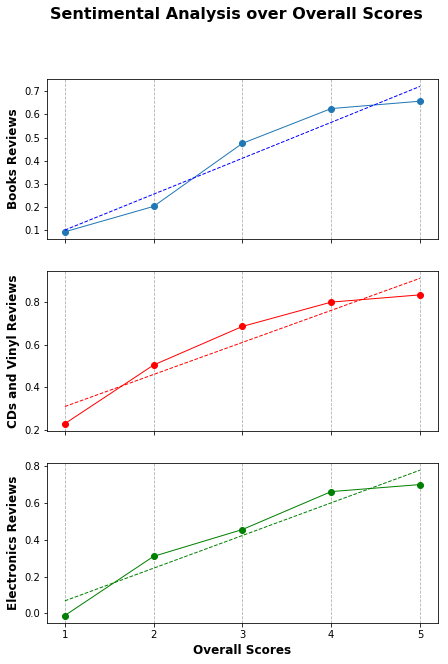

In [67]:
# chart for sentimental analysis vs overall numbers
overall_scores = [1, 2, 3, 4, 5]

fig, (ch_book, ch_cd, ch_elec) = plt.subplots(3, sharex=True, figsize=(7, 10))
fig.suptitle("Sentimental Analysis over Overall Scores", fontsize=16, fontweight="bold")

ch_book.plot(overall_scores, df_book_analys['Average Review Compound'], linewidth=1, marker="o")
ch_book.plot(overall_scores, book_fit, "b--", linewidth=1)
ch_book.set_ylabel('Books Reviews', fontsize=12, fontweight="bold")
ch_book.xaxis.grid(True, linestyle='--')

ch_cd.plot(overall_scores, df_cd_analys['Average Review Compound'], linewidth=1, marker="o", color="r")
ch_cd.plot(overall_scores, cd_fit, "r--", linewidth=1)
ch_cd.set_ylabel('CDs and Vinyl Reviews', fontsize=12, fontweight="bold")
ch_cd.xaxis.grid(True, linestyle='--')

ch_elec.plot(overall_scores, df_elec_analys['Average Review Compound'], linewidth=1, marker="o", color="g")
ch_elec.plot(overall_scores, elec_fit, "g--", linewidth=1)
ch_elec.set_ylabel('Electronics Reviews', fontsize=12, fontweight="bold")
ch_elec.set_xlabel("Overall Scores", fontsize=12, fontweight="bold")
ch_elec.xaxis.set_major_locator(MaxNLocator(integer=True))
ch_elec.xaxis.grid(True, linestyle='--')

plt.savefig('SentimentalAnalysis_OverallScores.png')

In [70]:
#  chart for sentimental analysis vs helpfulness for books.
review_book = just_book['reviewText']



overall_dict_book1 = {}

helpfulness_book1 = just_book['helpfulness']

compound_list_book = []

for row in review_book:
    
        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list_book.append(compound)



helpfulness_dict_book1 = {
    "Helpfulness" : helpfulness_book1,
    "Compounds" : compound_list_book,
}

df_book_analys1 = pd.DataFrame(helpfulness_dict_book1)
df_book_analys1.head(30)

,Compounds,Helpfulness
1585291,0.8952,1
1834341,0.5130,0.714286
631322,0.6395,0.354167
2709337,0.9917,1
1236846,0.6249,0.5
2989648,-0.3438,0
1728632,0.9858,0.9
2680313,0.6652,0.5
295427,0.9901,0.6
193901,0.9726,1


In [71]:
len(df_book_analys1)

4295

In [72]:
#  chart for sentimental analysis vs helpfulness for cds.
review_cd = just_cds['reviewText']


overall_dict_cd1 = {}

helpfulness_cd1 = just_cds['helpfulness']

compound_list_cd = []

for row in review_cd:
    
        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list_cd.append(compound)




        



helpfulness_dict_cd1 = {
    "Helpfulness" : helpfulness_cd1,
    "Compounds" : compound_list_cd,
}

df_cd_analys1 = pd.DataFrame(helpfulness_dict_cd1)
df_cd_analys1.head()

,Compounds,Helpfulness
318953,0.8974,0.5
304575,0.9966,0.666667
292897,0.6369,0.333333
111255,0.7579,0
311691,0.7820,0.375


In [73]:
#  chart for sentimental analysis vs helpfulness for cds.
review_elec = just_electronics['reviewText']

# for Books

overall_dict_elec1 = {}

helpfulness_elec1 = just_electronics['helpfulness']

compound_list_elec = []

for row in review_elec:
    
        results = analyzer.polarity_scores(row)

        compound = results["compound"]

        compound_list_elec.append(compound)




        



helpfulness_dict_elec1 = {
    "Helpfulness" : helpfulness_elec1,
    "Compounds" : compound_list_elec,
}

df_elec_analys1 = pd.DataFrame(helpfulness_dict_elec1)
df_elec_analys1.head()

,Compounds,Helpfulness
31659,0.9801,1
507559,0.8123,0.75
160750,0.8906,1
442016,0.3964,1
1489209,0.9966,1


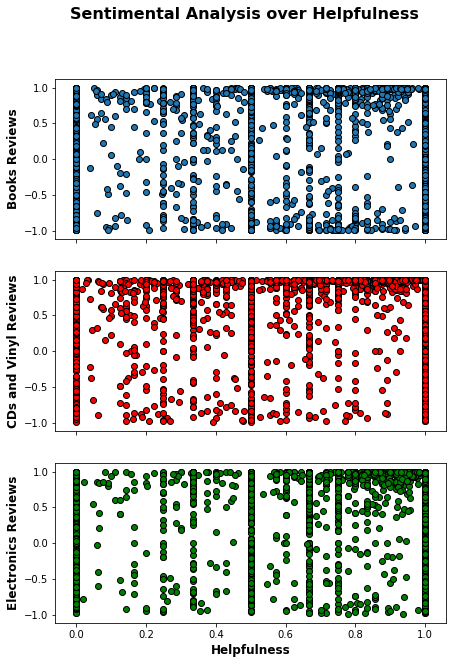

In [74]:
plots, (ax_book, ax_cd, ax_elec) = plt.subplots(3, sharex=True, figsize=(7, 10))
plots.suptitle("Sentimental Analysis over Helpfulness", fontsize=16, fontweight="bold")

ax_book.scatter(df_book_analys1['Helpfulness'], df_book_analys1['Compounds'], edgecolor='black')
ax_book.set_ylabel('Books Reviews', fontsize=12, fontweight="bold")
ax_cd.scatter(df_cd_analys1['Helpfulness'], df_cd_analys1['Compounds'], color='r', edgecolor='black')
ax_cd.set_ylabel('CDs and Vinyl Reviews', fontsize=12, fontweight="bold")
ax_elec.scatter(df_elec_analys1['Helpfulness'], df_elec_analys1['Compounds'], color='g', edgecolor='black')
ax_elec.set_ylabel('Electronics Reviews', fontsize=12, fontweight="bold")
ax_elec.set_xlabel("Helpfulness", fontsize=12, fontweight="bold")

plt.savefig('SentimentalAnalysis_Helpfulness.png')